### Importing Libraries:

In [1]:
import numpy as np
import sympy as sym
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

### Given Dataframe:

In [2]:
df = pd.read_csv('garments_worker_productivity.csv', parse_dates=['date'])
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Number of rows & columns in dataset:

In [3]:
df.shape

(1197, 15)

### Columns present in dataset:

In [4]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

### Checking datatype of each column:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

### Checking if there is any null value or not!

In [6]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

### Deleting the NaN values:

In [7]:
df.dropna(inplace=True)

### If there is any duplicate row in dataframe?

In [8]:
df.duplicated().sum()

0

In [9]:
print('Now the dataframe contains {} rows & {} columns' .format(df.shape[0], df.shape[1]))

Now the dataframe contains 691 rows & 15 columns


### Numerical Features:

In [10]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print('Total Number of Numerical Features = ', len(numerical_features))
print('Numerical Columns are: \n', numerical_features)

Total Number of Numerical Features =  11
Numerical Columns are: 
 ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


### Non-Numeric Features:

In [11]:
non_numerical_features = df.select_dtypes(exclude=np.number).columns.tolist()
print('Total Number of Non-Numerical Features = ', len(non_numerical_features))
print('Non-Numerical Columns are: \n', non_numerical_features)

Total Number of Non-Numerical Features =  4
Non-Numerical Columns are: 
 ['date', 'quarter', 'department', 'day']


## Feature Extraction:

### Creation of Year column:

In [12]:
garments_df = df.copy()
garments_df['year'] = pd.DatetimeIndex(garments_df['date']).year
garments_df['year'].value_counts()

2015    691
Name: year, dtype: int64

we can see; dataset contains information about 2015 year only

### Creation of Month column:

In [13]:
garments_df['month'] = pd.DatetimeIndex(garments_df['date']).month_name()
garments_df['month'].value_counts()

January     307
February    269
March       115
Name: month, dtype: int64

dataset contains information about first 3 months only

### Converting overtime(sec) to overtime(hrs):

In [14]:
garments_df['over_time_hrs'] = garments_df['over_time'] / 3600
garments_df[['over_time', 'over_time_hrs']].head()

,over_time,over_time_hrs
0,7080,1.966667
2,3660,1.016667
3,3660,1.016667
4,1920,0.533333
5,6720,1.866667


In [15]:
garments_df['quarter'].value_counts()

Quarter1    211
Quarter2    188
Quarter4    140
Quarter3    129
Quarter5     23
Name: quarter, dtype: int64

## Removing discrepancies from the dataset:

### Removal of irrelevant quarters:

In [16]:
for quarter in ['Quarter2', 'Quarter3', 'Quarter4', 'Quarter5']:
    garments_df.drop(garments_df[garments_df['quarter'] == quarter].index, inplace=True)

In [17]:
print('Finally the dataframe has {} rows & {} columns' \
      .format(garments_df.shape[0], garments_df.shape[1]))
garments_df.head()

Finally the dataframe has 211 rows & 18 columns


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month,over_time_hrs
0,2015-01-01,Quarter1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,January,1.966667
2,2015-01-01,Quarter1,sweing,Thursday,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,January,1.016667
3,2015-01-01,Quarter1,sweing,Thursday,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,January,1.016667
4,2015-01-01,Quarter1,sweing,Thursday,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,January,0.533333
5,2015-01-01,Quarter1,sweing,Thursday,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,2015,January,1.866667


In [18]:
garments_df['quarter'].value_counts()

Quarter1    211
Name: quarter, dtype: int64

In [19]:
garments_df['department'].value_counts()

sweing    211
Name: department, dtype: int64

In [20]:
garments_df['day'].value_counts()

Tuesday      36
Wednesday    36
Thursday     35
Sunday       35
Monday       35
Saturday     34
Name: day, dtype: int64

# (a). Performing Statistical Tests:

## 1. ANOVA Test: 
We want to check: **Whether average number of workers in first 3 months of 2015 in sweing department are equal or not?** <br>
**H0:** mu_workers_Jan = mu_workers_Feb = mu_workers_March <br>
**H1:** mu_workers_Jan <> mu_workers_Feb <> mu_workers_March

In [21]:
series1 = garments_df[garments_df['month'] == 'January']['no_of_workers'].values.tolist()
series2 = garments_df[garments_df['month'] == 'February']['no_of_workers'].values.tolist()
series3 = garments_df[garments_df['month'] == 'March']['no_of_workers'].values.tolist()

In [22]:
stats.f_oneway(series1, series2, series3)

F_onewayResult(statistic=0.09005013309855722, pvalue=0.913920976822872)

#### **<u>Conclusion:</u>**
since pvalue is greater than 0.05; we will accept H0 <br>
It means in the year of 2015; In sweing department, avg number of workers in Jan is same as February which is equal to that of March. <br>

**It means in Sweing department; Number of workers is consistent in that Garment Shop.**

## 2. Two Sample T-Test (unequal variance):
Our Assumption: **Those who are doing overtime more than 1.5 hours; are getting more incentives.**<br>
lets assume; Gr2 people are doing overtime for more than 1.5 hours & reverse is true for Gr1 <br>
**H0:** mu_incentive_Gr2 <= mu_incentive_Gr1 <br>
**H1:** mu_incentive_Gr2 > mu_incentive_Gr1 <br>
**It will be a right tail test**

In [23]:
Gr2 = garments_df[garments_df['over_time_hrs'] >= 1.5]
Gr1 = garments_df[garments_df['over_time_hrs'] < 1.5]
print('Number of Group1 people = ', Gr1.shape[0])
print('Number of Group2 people = ', Gr2.shape[0])

Number of Group1 people =  51
Number of Group2 people =  160


In [24]:
stats.ttest_ind(a = Gr2['incentive'], 
                b = Gr1['incentive'], 
                equal_var=False, 
                alternative='greater')

Ttest_indResult(statistic=2.0336480590727604, pvalue=0.02213916255129707)

#### **<u>Conclusion:</u>**
since p value is less than 0.05; so we will reject H0. <br>
it means our assumption was correct: **as people are doing more overtime, they are getting more incentives.**

## 3. Z-Proportion Test:
We want to check: **whether proportion of actual productivity is really high for those workers who are having high SMV?**<br>
**H0:** p1 <= p2 <br>
**H1:** p1 > p2 <br>
**it will be a right tail test**

### <u>steps required:</u> 
#### STEP-1: divide entire dataframe wrt SMV (Standard Minute Value):
#### STEP-2: now check how many workers have actual productivity more than 0.8? 
#### then find the proportion of those workers

In [25]:
df1 = garments_df[garments_df['smv']>20]
n1 = df1.shape[0]
x1 = df1[df1['actual_productivity'] > 0.8].shape[0]
print('n1 = ', n1)
print('x1 = ', x1)
p1 = x1/n1
print('p1 = ', p1)

n1 =  147
x1 =  72
p1 =  0.4897959183673469


In [26]:
df2 = garments_df[garments_df['smv']<=20]
n2 = df2.shape[0]
x2 = df2[df2['actual_productivity'] > 0.8].shape[0]
print('n2 = ', n2)
print('x2 = ', x2)
p2 = x2/n2
print('p2 = ', p2)

n2 =  64
x2 =  31
p2 =  0.484375


In [27]:
zstat, pvalue = proportions_ztest(count = np.array([x1,x2]), 
                                  nobs =np.array([n1,n2]) , 
                                  alternative='larger')
print('z stat = ', zstat)
print('p value = ', pvalue)

z stat =  0.0724156209935516
p value =  0.4711355768384891


#### **<u>Conclusion:</u>**
Since p value is greater than 0.05; so we will accept H0. <br>
it means those who are having high value of SMV; their actual productivity is not high.

## 4. F Test:
My Question: whether variance of actual productivity is same for Jan & March? <br>
**H0:** (sigma1)^2 = (sigma2)^2  <br>
**H1:** (sigma1)^2 is not equal to (sigma2)^2  <br>
**it will be two tail test**

In [28]:
alpha = 0.05     # significance level

In [29]:
act_prod_feb = garments_df[garments_df['month'] == 'January']['actual_productivity']
n1 = act_prod_feb.shape[0]
dof1 = n1 - 1
s1 = np.std(act_prod_feb)
print('s1 = ', s1)
print('dof1 = ', dof1)

s1 =  0.07687237721283226
dof1 =  71


In [30]:
act_prod_march = garments_df[garments_df['month'] == 'March']['actual_productivity']
n2 = act_prod_march.shape[0]
dof2 = n2 - 1
s2 = np.std(act_prod_march)
print('s2 = ', s2)
print('dof2 = ', dof2)

s2 =  0.1342536325693506
dof2 =  67


In [31]:
num = s2 / (n2-1)
dof_num = (n2-1)
den = s1 / (n1-1)
dof_den = (n1-1)
Fcalculated = num / den
Fcritical_right = stats.f.isf(alpha/2, dfn = dof_num, dfd = dof_den)
Fcritical_left = stats.f.isf(1-alpha/2, dof_num, dof_den)
print('Fcritical_right = ', np.round(Fcritical_right , 3))
print('Fcritical_left = ', np.round(Fcritical_left , 3))
print('Fcalculated = ', Fcalculated)

Fcritical_right =  1.607
Fcritical_left =  0.62
Fcalculated =  1.8507138711009978


#### **<u>Conclusion:</u>**
Since Fcalculated > Fcritical_right_tail; so we will reject H0 <br>
it means variance of actual productivity of Jan & March are not same.

## Preprocessing Steps before Machine Learning Model Implementation:

### Histogram plot for numerical features:

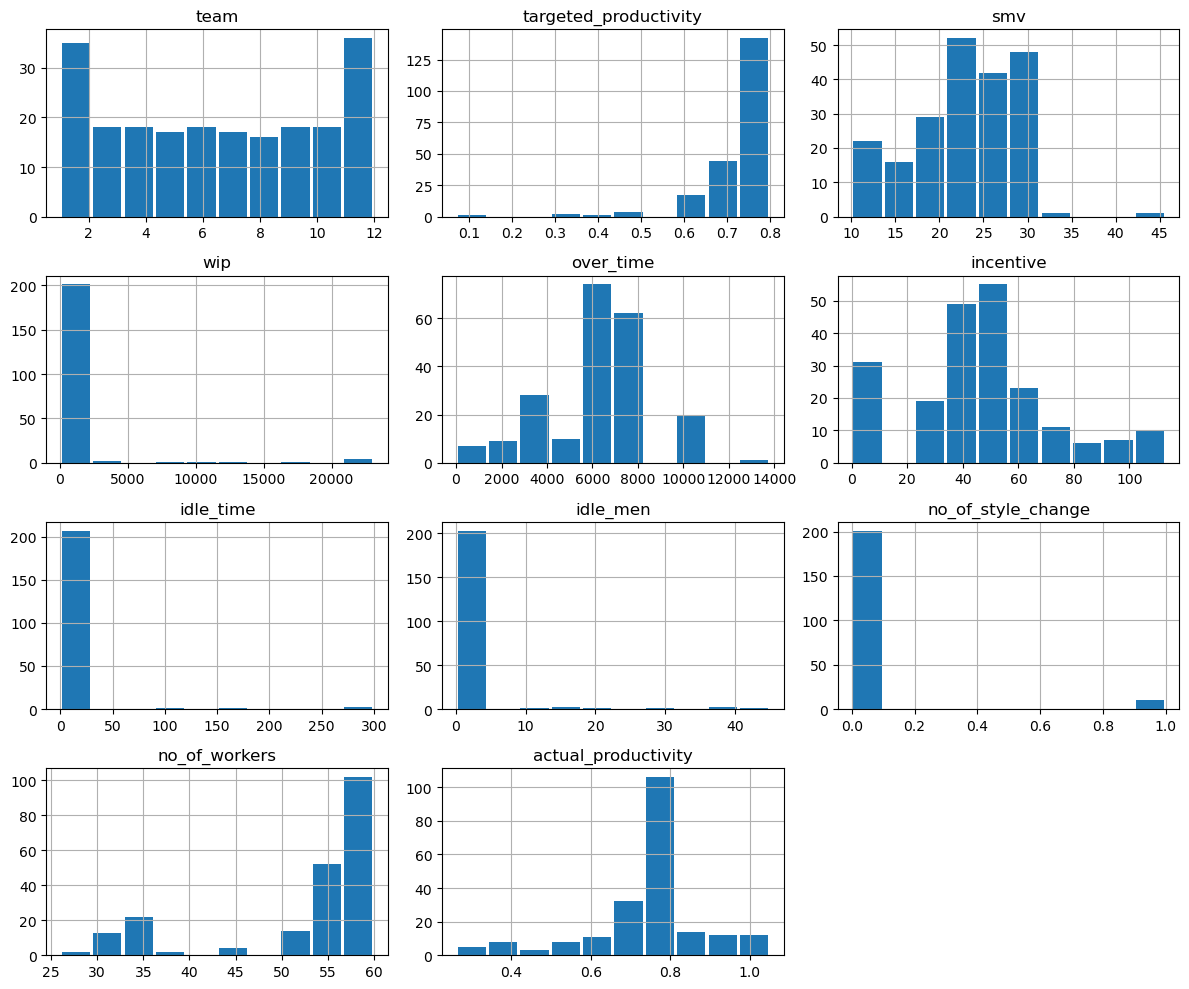

In [32]:
garments_df[numerical_features].hist(rwidth=0.9, figsize = (12,10))
plt.tight_layout();

### User Defined function to Visualize Outliers:

In [33]:
def outlier_treatment(dataframe, column_name):
    
    count1 = count2 = total_count = axis1 = axis2 = Q1 = Q3 = IQR = 0
    low_limit = upper_limit = percent = 0
    choice = ''
    
    plt.figure(figsize=(8,3))
    axis1 = plt.subplot(1,2,1)
    sns.boxplot(data = dataframe, x = column_name, ax = axis1)
    plt.title('Box Plot for %s' %(column_name))
    axis2 = plt.subplot(1,2,2)
    sns.histplot(data = dataframe, x = column_name, kde = True, ax = axis2,
                 color ='navy', line_kws = {'lw':3, 'ls':'-'})
    plt.title('Histogram Plot for %s' %(column_name))
    plt.tight_layout();

    Q1 = dataframe[column_name].quantile([0.25,0.75]).values[0]
    Q2 = np.percentile(dataframe[column_name], 50)
    Q3 = dataframe[column_name].quantile([0.25,0.75]).values[1]
    IQR = Q3 - Q1
    low_limit   = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    count1 = sum(dataframe[column_name] < low_limit)
    count2 = sum(dataframe[column_name] > upper_limit)
    total_count = count1 + count2
    print('Q1                                                = ', np.round(Q1,2))
    print('Q2                                                = ', np.round(Q2,2))
    print('Q3                                                = ', np.round(Q3,2))
    print('IQR                                               = ', np.round(IQR,2))
    if count1 > 0:
        print('Lower Limit Value                                 = ', np.round(low_limit,2))
        print('Total number of outliers(<Q1-1.5*IQR) for {}      = {}'
              .format(column_name, count1))
    if count2 > 0:
        print('Upper Limit Value                                 = ', np.round(upper_limit,2))
        print('Total number of outliers(>Q3+1.5*IQR) for {}      = {}'
              .format(column_name, count2))
    percent = np.round((total_count/(dataframe[column_name].shape[0]))*100,2)
    if total_count > 0:
        print('Percentage of Outliers                            = {}%'.format(percent))
        choice = input('Do you want to remove all outliers from {} column? \
               \n(press y to confirm / else press n to adjust all outliers to upper or lower limit): '
                       .format(column_name.upper()))
        while (choice.lower() != 'y') and (choice.lower() != 'n'):
            print('invalid choice..please try again')
            choice = input('Do you want to remove all outliers from {} column (y/n)?' 
                           .format(column_name.upper()))
        if choice.lower() == 'y':
            dataframe.loc[(dataframe[column_name] < low_limit), column_name] = np.nan
            dataframe.loc[(dataframe[column_name] > upper_limit), column_name] = np.nan
            dataframe.dropna(axis=0, inplace = True)
        elif choice.lower() == 'n':
            if count1 > 0:
                dataframe.loc[(dataframe[column_name]<low_limit),column_name] = low_limit
            if count2 > 0:
                dataframe.loc[(dataframe[column_name]>upper_limit),column_name] = upper_limit

        plt.figure(figsize=(8,3))
        axis1 = plt.subplot(1,2,1)
        sns.boxplot(data = dataframe, x = column_name, ax = axis1)
        plt.title('Box Plot for %s without Outliers' %(column_name))
        plt.tight_layout()
        axis2 = plt.subplot(1,2,2)
        sns.histplot(data = dataframe, x = column_name, kde = True, ax = axis2,
                     color='navy', line_kws = {'lw':3, 'ls':'-'})
        plt.title('Histogram Plot for %s without Outliers' %(column_name))
        plt.tight_layout();

### Handling of Outliers:

Q1                                                =  3.5
Q2                                                =  6.0
Q3                                                =  10.0
IQR                                               =  6.5


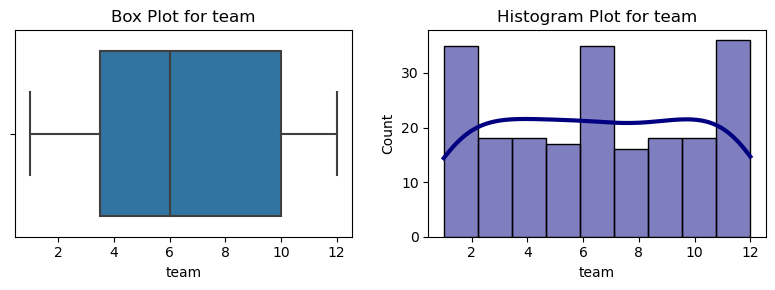

In [34]:
outlier_treatment(garments_df, 'team')

Q1                                                =  0.7
Q2                                                =  0.8
Q3                                                =  0.8
IQR                                               =  0.1
Lower Limit Value                                 =  0.55
Total number of outliers(<Q1-1.5*IQR) for targeted_productivity      = 8
Percentage of Outliers                            = 3.79%
Do you want to remove all outliers from TARGETED_PRODUCTIVITY column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


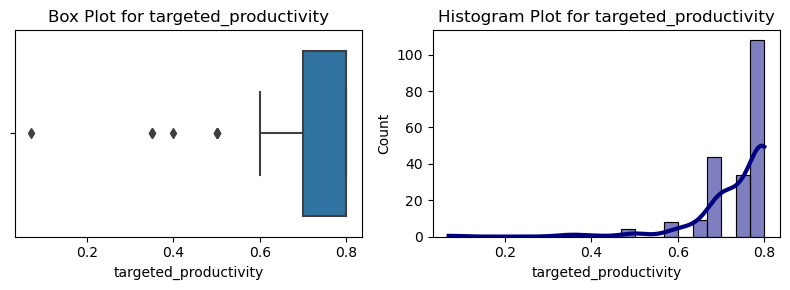

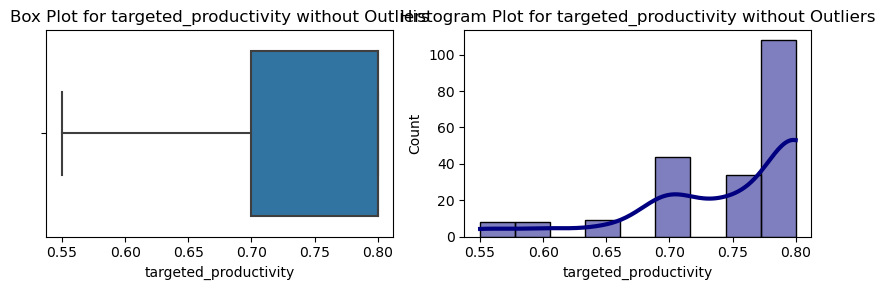

In [35]:
outlier_treatment(garments_df, 'targeted_productivity')

Q1                                                =  19.05
Q2                                                =  23.41
Q3                                                =  27.48
IQR                                               =  8.43
Upper Limit Value                                 =  40.13
Total number of outliers(>Q3+1.5*IQR) for smv      = 1
Percentage of Outliers                            = 0.47%
Do you want to remove all outliers from SMV column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


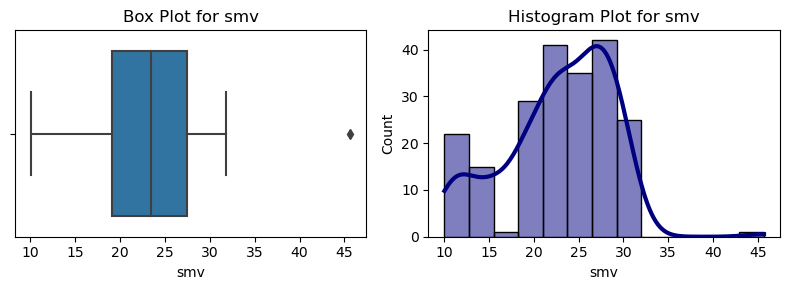

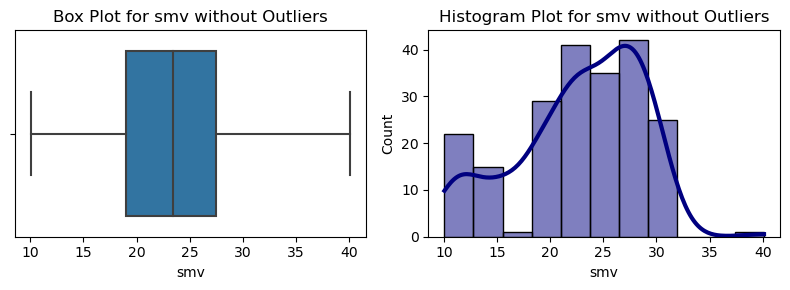

In [36]:
outlier_treatment(garments_df, 'smv')

Q1                                                =  724.5
Q2                                                =  1029.0
Q3                                                =  1226.5
IQR                                               =  502.0
Upper Limit Value                                 =  1979.5
Total number of outliers(>Q3+1.5*IQR) for wip      = 10
Percentage of Outliers                            = 4.74%
Do you want to remove all outliers from WIP column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


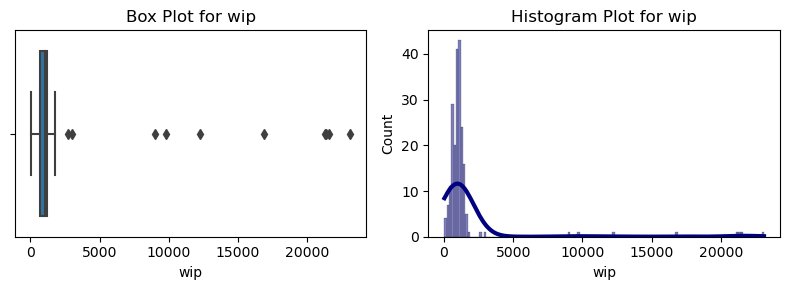

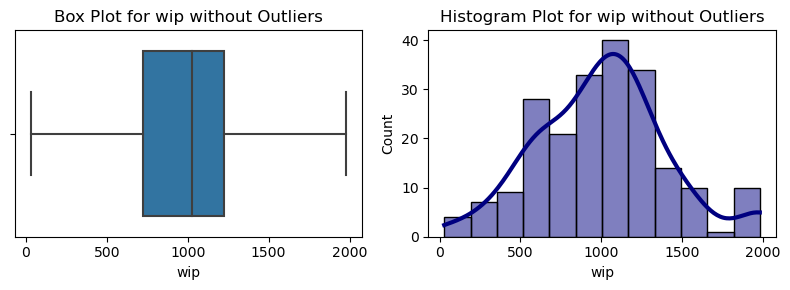

In [37]:
outlier_treatment(garments_df, 'wip')

Q1                                                =  5475.0
Q2                                                =  6780.0
Q3                                                =  6960.0
IQR                                               =  1485.0
Lower Limit Value                                 =  3247.5
Total number of outliers(<Q1-1.5*IQR) for over_time      = 21
Upper Limit Value                                 =  9187.5
Total number of outliers(>Q3+1.5*IQR) for over_time      = 21
Percentage of Outliers                            = 19.91%
Do you want to remove all outliers from OVER_TIME column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


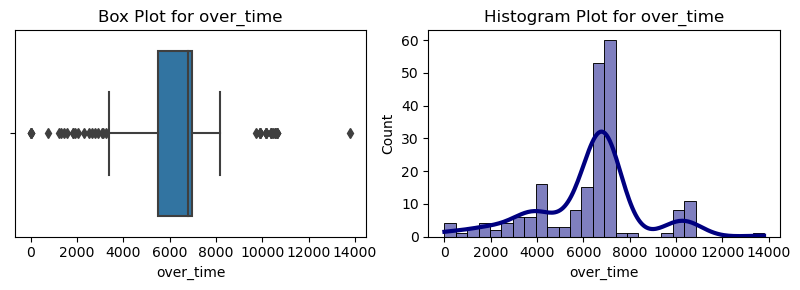

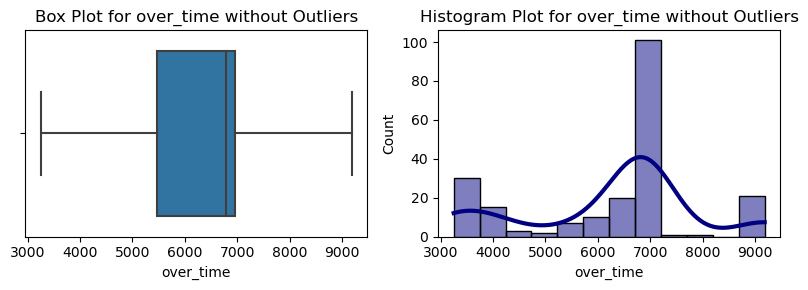

In [38]:
outlier_treatment(garments_df, 'over_time')

Q1                                                =  34.0
Q2                                                =  50.0
Q3                                                =  60.0
IQR                                               =  26.0
Upper Limit Value                                 =  99.0
Total number of outliers(>Q3+1.5*IQR) for incentive      = 16
Percentage of Outliers                            = 7.58%
Do you want to remove all outliers from INCENTIVE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


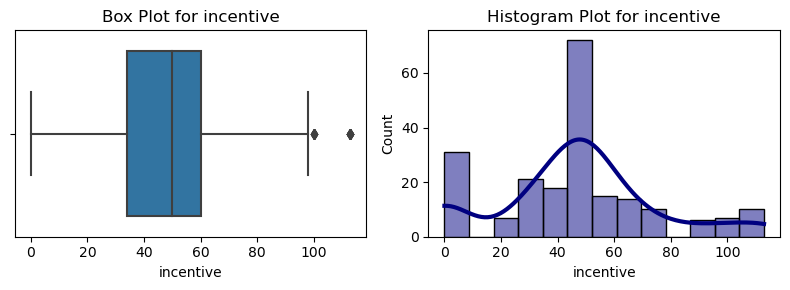

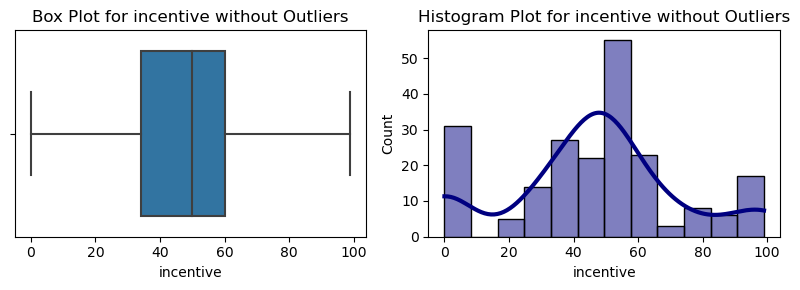

In [39]:
outlier_treatment(garments_df, 'incentive')

Q1                                                =  52.0
Q2                                                =  56.5
Q3                                                =  58.0
IQR                                               =  6.0
Lower Limit Value                                 =  43.0
Total number of outliers(<Q1-1.5*IQR) for no_of_workers      = 39
Percentage of Outliers                            = 18.48%
Do you want to remove all outliers from NO_OF_WORKERS column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


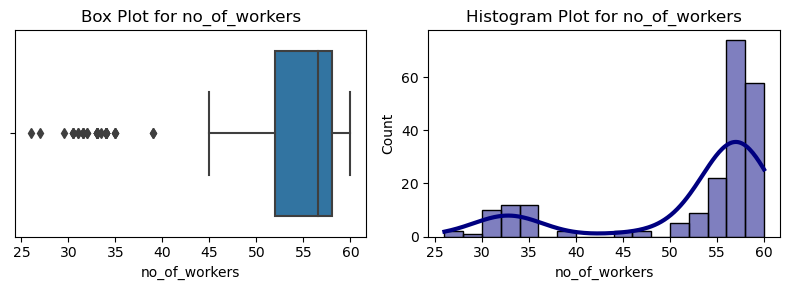

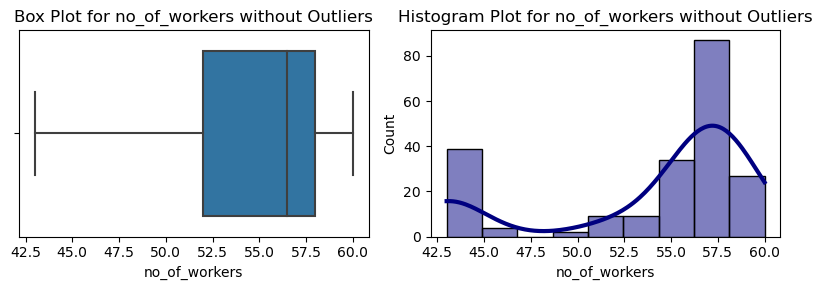

In [40]:
outlier_treatment(garments_df, 'no_of_workers')

Q1                                                =  0.7
Q2                                                =  0.8
Q3                                                =  0.8
IQR                                               =  0.1
Lower Limit Value                                 =  0.55
Total number of outliers(<Q1-1.5*IQR) for actual_productivity      = 23
Upper Limit Value                                 =  0.95
Total number of outliers(>Q3+1.5*IQR) for actual_productivity      = 12
Percentage of Outliers                            = 16.59%
Do you want to remove all outliers from ACTUAL_PRODUCTIVITY column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): n


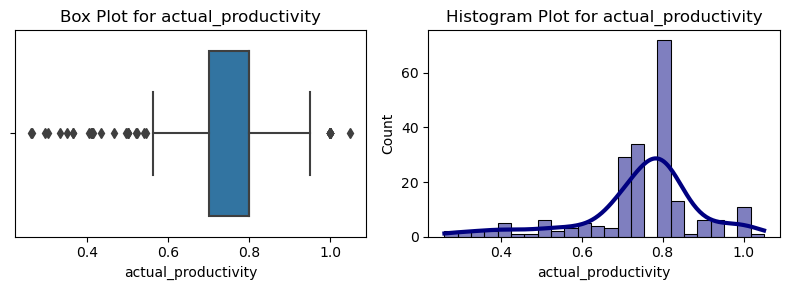

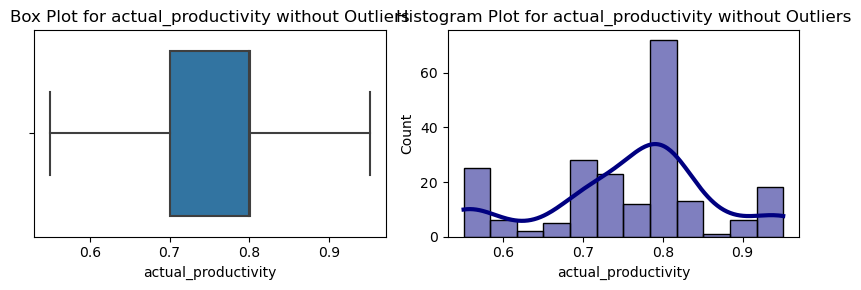

In [41]:
outlier_treatment(garments_df, 'actual_productivity')

### Correlation Matrix:

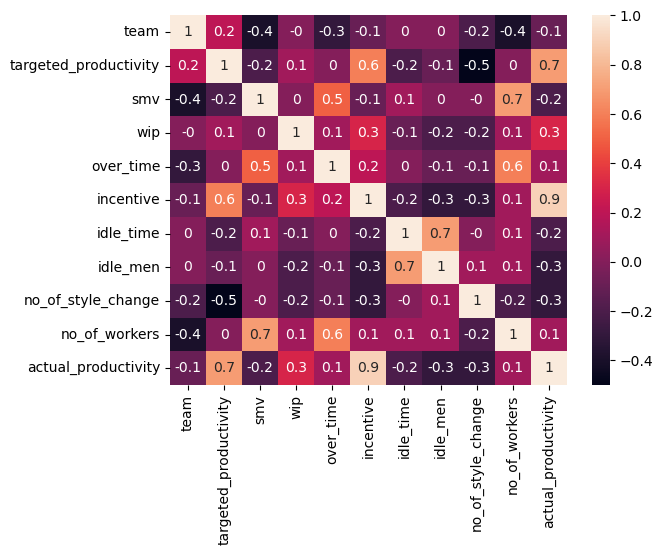

In [42]:
input_cols = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
              'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
target_col = ['actual_productivity']
all_cols = input_cols + target_col

corr_matrix = np.round(garments_df[all_cols].corr(),1)
sns.heatmap(corr_matrix, annot=True);

### Normalization of Input Features:

In [43]:
df_n1 = garments_df.copy()
scaler1 = StandardScaler()
df_n1[input_cols] = scaler1.fit_transform(df_n1[input_cols])

### Creation of Design Matrix:

In [44]:
x = df_n1[input_cols]
y = df_n1['actual_productivity']

# (b). Linear Regression(OLS) Implementation:

In [45]:
x_modf = sm.add_constant(x)
ols_model = sm.OLS(y, x_modf)
result = ols_model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                     146.6
Date:                 Tue, 01 Aug 2023   Prob (F-statistic):           2.42e-86
Time:                         11:33:33   Log-Likelihood:                 395.80
No. Observations:                  211   AIC:                            -769.6
Df Residuals:                      200   BIC:                            -732.7
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

# Modified OLS:

In [46]:
removed_cols = ['over_time', 'no_of_style_change', 'no_of_workers', 'wip']
x1 = x.drop(removed_cols, axis=1)

x1_modf = sm.add_constant(x1)
ols = sm.OLS(y, x1_modf)
result1 = ols.fit()
print(result1.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.877
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                     243.0
Date:                 Tue, 01 Aug 2023   Prob (F-statistic):           4.89e-90
Time:                         11:33:33   Log-Likelihood:                 393.48
No. Observations:                  211   AIC:                            -773.0
Df Residuals:                      204   BIC:                            -749.5
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

#### **<u>Conclusion:</u>**
* If team size increases by 1 unit; actual productivity will be gone down by 1%
* If targeted productivity increases by 1 unit; actual productivity will go up by 3.6%
* If SMV increases by 1 unit; actual productivity will be gone down by 0.8%
* If idle time increases by 1 unit; actual productivity will go up by 0.8%
* If number of idle men increases by 1 unit; actual productivity will go down by 0.12%

# (c). Implementation of Logistic Regression:

In [47]:
incentive_list = garments_df['incentive'].tolist()
print(incentive_list)
print('\nMin incentive is = {} & Max incentive is = {}' \
      .format(min(incentive_list), max(incentive_list)))

[98, 50, 50, 50, 38, 45, 34, 45, 44, 45, 50, 0, 50, 50, 50, 63, 50, 50, 50, 38, 56, 45, 0, 40, 50, 60, 60, 45, 50, 63, 50, 50, 45, 45, 40, 26, 75, 50, 38, 63, 50, 50, 50, 50, 50, 45, 45, 23, 75, 75, 50, 50, 50, 50, 38, 38, 38, 45, 45, 35, 75, 75, 60, 63, 50, 50, 50, 50, 50, 69, 40, 40, 99, 99, 99, 75, 60, 45, 45, 75, 26, 0, 0, 99, 88, 70, 88, 63, 50, 55, 60, 30, 0, 0, 0, 99, 90, 99, 99, 63, 50, 34, 60, 30, 0, 0, 0, 99, 99, 99, 88, 38, 50, 30, 0, 60, 0, 0, 23, 99, 99, 99, 99, 38, 50, 34, 30, 0, 0, 23, 0, 99, 99, 88, 88, 63, 50, 34, 45, 0, 30, 0, 0, 63, 56, 45, 45, 34, 38, 30, 38, 0, 50, 23, 0, 65, 63, 50, 50, 0, 34, 45, 45, 55, 34, 30, 50, 60, 50, 50, 50, 50, 56, 34, 45, 30, 30, 0, 38, 50, 63, 50, 60, 50, 34, 40, 30, 0, 0, 0, 50, 63, 50, 50, 45, 50, 40, 30, 0, 0, 0, 75, 70, 60, 63, 50, 45, 30, 0, 0, 24]

Min incentive is = 0 & Max incentive is = 99


### Creation of categorical feature named as incentive_catg :

In [48]:
def incentive_category(data):
    if data > 40:
        return 'High'
    else:
        return 'Low'

garments_df['incentive_catg'] = garments_df['incentive'].apply(incentive_category)

### Normalization of Input Features:

In [49]:
inp_cols = ['month', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_time', 
            'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

inp_cols1 = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_time', 
            'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

df_n2 = garments_df.copy()
scaler2 = StandardScaler()
df_n2[inp_cols1] = scaler2.fit_transform(df_n2[inp_cols1])

### Creation of Design Matrix:

In [50]:
x2 = df_n2[inp_cols]
y2 = df_n2['incentive_catg']

### OneHot Encoding:

In [51]:
x2 = pd.get_dummies(x2, drop_first=True)
x2.head()

,team,targeted_productivity,smv,wip,over_time,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month_January,month_March
0,0.428349,0.77286,0.573790,0.255347,0.505325,-0.130655,-0.179228,-0.22305,0.888675,1.707569,1,0
2,1.291868,0.77286,-1.972682,-0.094918,-1.558181,-0.130655,-0.179228,-0.22305,-1.916530,0.397745,1,0
3,1.579708,0.77286,-1.972682,-0.094918,-1.558181,-0.130655,-0.179228,-0.22305,-1.916530,0.397745,1,0
4,-0.147330,0.77286,0.528903,0.410465,-1.807069,-0.130655,-0.179228,-0.22305,0.362699,0.395983,1,0
5,0.140509,0.77286,0.528903,-0.054888,0.288114,-0.130655,-0.179228,-0.22305,0.362699,0.393581,1,0


In [52]:
def label_encoding_incentive(data):
    if data == 'High':
        return 1
    else:
        return 0
y2 = y2.apply(label_encoding_incentive)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=1234)

# Logistic Regression Model Implementation:

In [54]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation:

### Train & Test Accuracy:

In [55]:
y_predict_test = LR.predict(x_test)
print('Train Accuracy = ', LR.score(x_train, y_train))
print('Test Accuracy  = ', metrics.accuracy_score(y_test, y_predict_test))

Train Accuracy =  0.8775510204081632
Test Accuracy  =  0.859375


### Model Coefficients:

In [56]:
print(x_train.columns.tolist())
print('\n')
print(LR.coef_[0])

['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month_January', 'month_March']


[-0.09828765  0.81391532 -0.45017792  0.41060411  0.0124462  -0.33860282
  0.20405824  0.09476999  0.43254663  1.94946945  0.07518676  0.06490364]


### Confusion Matrix & Classification Report:

In [57]:
cm = confusion_matrix(y_test, y_predict_test)
tn, fp, fn, tp = [cm[0,0], cm[0,1], cm[1,0], cm[1,1]]
print('Confusion Matrix:')
display(sym.Matrix(cm))
print('True Negative  = ', tn)
print('False Positive = ', fp)
print('False Negative = ', fn)
print('True Positive  = ', tp)
print('\nTest Statistics:')
print('Precision      = ', precision_score(y_test, y_predict_test, pos_label=0))
print('Recall         = ', recall_score(y_test, y_predict_test, pos_label=0))
print('F1 Score       = ', f1_score(y_test, y_predict_test, pos_label=0))

Confusion Matrix:


Matrix([
[18,  5],
[ 4, 37]])

True Negative  =  18
False Positive =  5
False Negative =  4
True Positive  =  37

Test Statistics:
Precision      =  0.8181818181818182
Recall         =  0.782608695652174
F1 Score       =  0.8
